In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans , MeanShift ,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# load data

In [29]:
data = pd.read_csv("Downloads/prediktiv_data.csv")
data.head()

,id,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
0,1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,...,2,good,bad,3,1,5,2010,0,0,1960
1,2,105000,1.0,730.0,0,882.0,896,5,896,5,...,0,NaN,bad,2,1,6,2010,0,0,1961
2,3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,...,0,NaN,good,3,1,6,2010,1,0,1958
3,4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,...,2,bad,amazing,3,1,4,2010,1,0,1968
4,5,189900,2.0,482.0,0,928.0,928,6,1629,5,...,1,bad,bad,3,1,3,2010,1,701,1998


In [30]:
data.columns


Index(['id', 'target', 'feature01', 'feature02', 'feature03', 'feature04',
       'feature05', 'feature06', 'feature07', 'feature08', 'feature09',
       'feature10', 'feature10.1', 'feature11', 'feature12', 'feature13',
       'feature14', 'feature15', 'feature16', 'feature17', 'feature18',
       'feature19', 'feature20', 'feature21', 'feature22', 'feature23'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature01    2929 non-null   float64
 1   feature02    2929 non-null   float64
 2   feature03    2930 non-null   int64  
 3   feature04    2929 non-null   float64
 4   feature05    2930 non-null   int64  
 5   feature06    2930 non-null   int64  
 6   feature07    2930 non-null   int64  
 7   feature08    2930 non-null   int64  
 8   feature09    2930 non-null   int64  
 9   feature10    2930 non-null   int64  
 10  feature10.1  2930 non-null   int64  
 11  feature11    198 non-null    object 
 12  feature12    572 non-null    object 
 13  feature13    2929 non-null   object 
 14  feature14    2930 non-null   int64  
 15  feature15    1508 non-null   object 
 16  feature16    2930 non-null   object 
 17  feature17    2930 non-null   int64  
 18  feature18    2930 non-null   int64  
 19  featur

# preprocessing the data

In [31]:
data = data.drop(['id' , 'target'] , axis = 1)
# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=[np.number])
non_numeric_columns = data.select_dtypes(exclude=[np.number])
# Fill missing values in numeric columns with the mean
numeric_columns = numeric_columns.fillna(numeric_columns.mean())


In [32]:
# numeric_columns
# non_numeric_columns

In [33]:
# data.head()

In [34]:
# Standardize the numeric data 
scaler = StandardScaler()
numeric_columns_scaled = scaler.fit_transform(numeric_columns)


In [35]:
# Combine the standardized numeric data and non-numeric columns
data_scaled = pd.concat([pd.DataFrame(numeric_columns_scaled, columns=numeric_columns.columns), non_numeric_columns], axis=1)

In [36]:
# Apply PCA
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(numeric_columns_scaled)

In [37]:
# Apply clustering (e.g., K-Means)
kmeans = KMeans(n_clusters=3 ) 
cluster_labels = kmeans.fit_predict(pca_result)


C:\Users\NADEEM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
# Silhouette score evaluation
kmeans_score = silhouette_score(pca_result, cluster_labels)

In [39]:
print('The KMeans Silhouette Score is : ', kmeans_score)

The KMeans Silhouette Score is :  0.4474491173699716


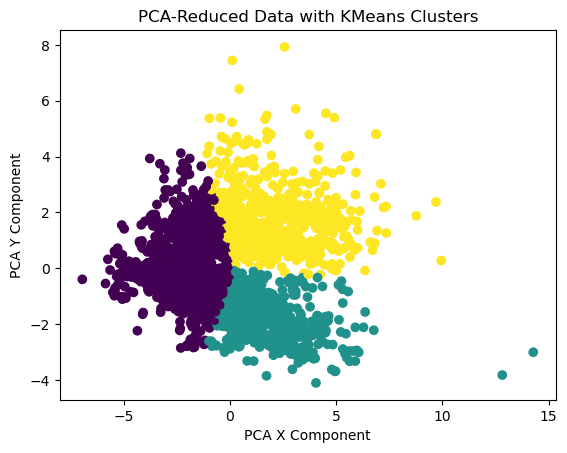

In [40]:
# Plot PCA-reduced data with clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA-Reduced Data with KMeans Clusters')
plt.xlabel('PCA X Component')
plt.ylabel('PCA Y Component')
plt.show()

In [46]:
from sklearn.cluster import  estimate_bandwidth
bandwidth = estimate_bandwidth(pca_result, quantile=0.2)

In [47]:
# clustering MeanShift
MeanShift = MeanShift(bandwidth = bandwidth)  
meanshift_labels = MeanShift.fit_predict(pca_result)

In [48]:
# Silhouette score evaluation
MeanShift_score = silhouette_score(pca_result, meanshift_labels)

In [49]:
print('The M MeanShift Score is : ', MeanShift_score)

The M MeanShift Score is :  0.3760671560114591


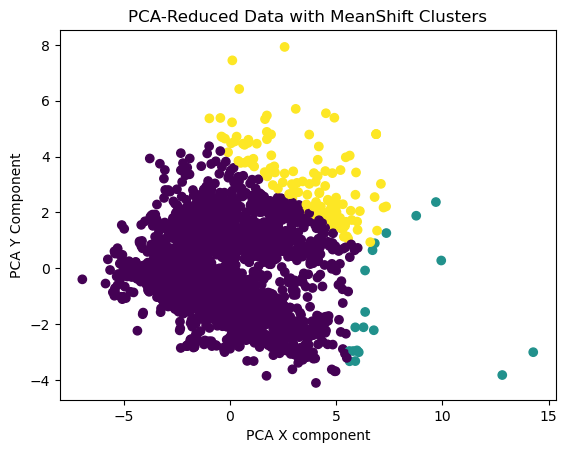

In [50]:

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=meanshift_labels , cmap='viridis')
plt.title('PCA-Reduced Data with MeanShift Clusters')
plt.xlabel('PCA X component')
plt.ylabel('PCA Y Component')
plt.show()

In [25]:
hierarchical = AgglomerativeClustering(n_clusters=3) 
hierarchical_labels = hierarchical.fit_predict(pca_result)

In [26]:
# Silhouette score evaluation
hierarchical_score = silhouette_score(pca_result, hierarchical_labels)

In [27]:
print('The M hierarchical Score is : ', hierarchical_score)

The M hierarchical Score is :  0.43518753229049295


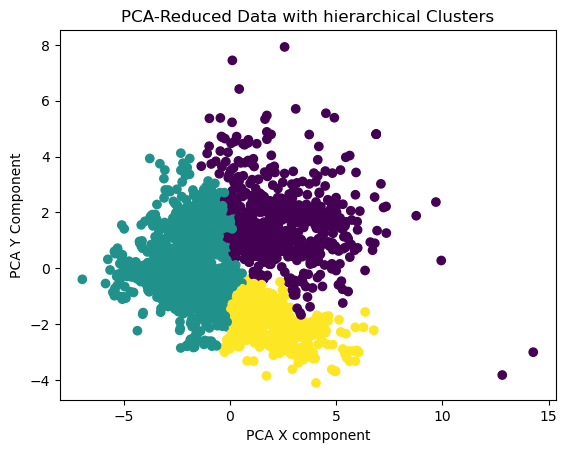

In [22]:
# Plot PCA-reduced data with clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('PCA-Reduced Data with hierarchical Clusters')
plt.xlabel('PCA X component')
plt.ylabel('PCA Y Component')
plt.show()